In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns
import os

In [84]:
file_path = "LevelAnalysis/LevelTwo/SpreadsheetData/Playtest_Level2_11_12_24.csv"

with open(file_path, "r") as file:
    lines = file.readlines()

filtered_lines = [line for line in lines if not (line.startswith("Link to form") or line.strip(",\n") == "")]

# Convert filtered lines to a DataFrame
from io import StringIO
cleaned_csv = StringIO("".join(filtered_lines))
df = pd.read_csv(cleaned_csv)

df.head()

,Timestamp,SessionID,Most Common State,MCS Overall Data,MCS Data / Checkpoint,Respawn Counts,Diamond Collection Data,Heatmap Data
0,11/12/2024 1:09:50,6.386700e+17,STATE_MED,"{""STATE_SMALL"": 8.171906, ""STATE_MED"": 193.928...","{""Start"": {""STATE_SMALL"": 3.286301, ""STATE_MED...","{""Checkpoint 1"": 0, ""Checkpoint 2"": 0, ""Checkp...","{""Start"": 25, ""Checkpoint 1"": 6, ""Checkpoint 2...","{""keys"":[{""x"":-17.0,""y"":1.0},{""x"":-16.0,""y"":1...."
1,11/12/2024 1:18:09,6.386700e+17,STATE_MED,"{""STATE_SMALL"": 10.49203, ""STATE_MED"": 141.61,...","{""Start"": {""STATE_SMALL"": 3.419815, ""STATE_MED...","{""Checkpoint 1"": 1, ""Checkpoint 2"": 1, ""Checkp...","{""Start"": 15, ""Checkpoint 1"": 6, ""Checkpoint 2...","{""keys"":[{""x"":-17.0,""y"":1.0},{""x"":-15.0,""y"":3...."
2,11/12/2024 2:48:12,6.386700e+17,STATE_MED,"{""STATE_SMALL"": 12.66058, ""STATE_MED"": 165.394...","{""Start"": {""STATE_SMALL"": 3.903198, ""STATE_MED...","{""Checkpoint 1"": 0, ""Checkpoint 2"": 0, ""Checkp...","{""Start"": 25, ""Checkpoint 1"": 6, ""Checkpoint 2...","{""keys"":[{""x"":-17.0,""y"":1.0},{""x"":-16.0,""y"":1...."
3,11/12/2024 17:54:34,6.386700e+17,STATE_MED,"{""STATE_SMALL"": 25.52457, ""STATE_MED"": 293.248...","{""Start"": {""STATE_SMALL"": 3.992523, ""STATE_MED...","{""Checkpoint 1"": 0, ""Checkpoint 2"": 8, ""Checkp...","{""Start"": 25, ""Checkpoint 1"": 6, ""Checkpoint 2...","{""keys"":[{""x"":-17.0,""y"":1.0},{""x"":-17.0,""y"":0...."
4,11/20/2024 3:05:39,6.386770e+17,STATE_MED,"{""STATE_SMALL"": 16.65335, ""STATE_MED"": 373.619...","{""Start"": {""STATE_SMALL"": 7.98111, ""STATE_MED""...","{""Checkpoint 1"": 0, ""Checkpoint 2"": 1, ""Checkp...","{""Start"": 25, ""Checkpoint 1"": 6, ""Checkpoint 2...","{""keys"":[{""x"":-17.0,""y"":1.0},{""x"":-14.0,""y"":2...."


In [85]:
# Map session id to a row index
df["SessionID"] = df.index
df.head()

,Timestamp,SessionID,Most Common State,MCS Overall Data,MCS Data / Checkpoint,Respawn Counts,Diamond Collection Data,Heatmap Data
0,11/12/2024 1:09:50,0,STATE_MED,"{""STATE_SMALL"": 8.171906, ""STATE_MED"": 193.928...","{""Start"": {""STATE_SMALL"": 3.286301, ""STATE_MED...","{""Checkpoint 1"": 0, ""Checkpoint 2"": 0, ""Checkp...","{""Start"": 25, ""Checkpoint 1"": 6, ""Checkpoint 2...","{""keys"":[{""x"":-17.0,""y"":1.0},{""x"":-16.0,""y"":1...."
1,11/12/2024 1:18:09,1,STATE_MED,"{""STATE_SMALL"": 10.49203, ""STATE_MED"": 141.61,...","{""Start"": {""STATE_SMALL"": 3.419815, ""STATE_MED...","{""Checkpoint 1"": 1, ""Checkpoint 2"": 1, ""Checkp...","{""Start"": 15, ""Checkpoint 1"": 6, ""Checkpoint 2...","{""keys"":[{""x"":-17.0,""y"":1.0},{""x"":-15.0,""y"":3...."
2,11/12/2024 2:48:12,2,STATE_MED,"{""STATE_SMALL"": 12.66058, ""STATE_MED"": 165.394...","{""Start"": {""STATE_SMALL"": 3.903198, ""STATE_MED...","{""Checkpoint 1"": 0, ""Checkpoint 2"": 0, ""Checkp...","{""Start"": 25, ""Checkpoint 1"": 6, ""Checkpoint 2...","{""keys"":[{""x"":-17.0,""y"":1.0},{""x"":-16.0,""y"":1...."
3,11/12/2024 17:54:34,3,STATE_MED,"{""STATE_SMALL"": 25.52457, ""STATE_MED"": 293.248...","{""Start"": {""STATE_SMALL"": 3.992523, ""STATE_MED...","{""Checkpoint 1"": 0, ""Checkpoint 2"": 8, ""Checkp...","{""Start"": 25, ""Checkpoint 1"": 6, ""Checkpoint 2...","{""keys"":[{""x"":-17.0,""y"":1.0},{""x"":-17.0,""y"":0...."
4,11/20/2024 3:05:39,4,STATE_MED,"{""STATE_SMALL"": 16.65335, ""STATE_MED"": 373.619...","{""Start"": {""STATE_SMALL"": 7.98111, ""STATE_MED""...","{""Checkpoint 1"": 0, ""Checkpoint 2"": 1, ""Checkp...","{""Start"": 25, ""Checkpoint 1"": 6, ""Checkpoint 2...","{""keys"":[{""x"":-17.0,""y"":1.0},{""x"":-14.0,""y"":2...."


In [86]:
df.iloc[0]["Diamond Collection Data"]

'{"Start": 25, "Checkpoint 1": 6, "Checkpoint 2": 5, "Checkpoint 4": 17, "Checkpoint 5": 20, "Checkpoint 6": 5}'

In [63]:
def save_plot(figure, save_path):
    figure.savefig(save_path)
    plt.close(figure)

In [64]:
def plot_mcs_data_overall(datapoint):
   states = list(datapoint.keys())
   fig = plt.figure(figsize=(10, 6))
   time_spent = list(datapoint.values())

   plt.bar(states, time_spent, color='skyblue')
   plt.title("Total Most Common State Data")
   plt.xlabel("State")
   plt.ylabel("Time Spent")
   
   return fig

In [65]:
datapoint = json.loads(df.iloc[0]["MCS Overall Data"])
graph = plot_mcs_data_overall(datapoint)
save_plot(graph, "LevelAnalysis/LevelTwo/Insights/Player0/MCSOverallData.png")


In [66]:
def plot_mcs_data_checkpoint(datapoint):
    temp_df = pd.DataFrame(datapoint).T
    fig = plt.figure(figsize=(10, 6))
    sns.heatmap(temp_df, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Time Spent'})
    plt.title("Time Spent in Different States at Each Checkpoint")
    plt.xlabel("Player State")
    plt.ylabel("Checkpoint")
    return fig


In [67]:
data = json.loads(df.iloc[0]["MCS Data / Checkpoint"])
graph = plot_mcs_data_checkpoint(data)
save_plot(graph, "LevelAnalysis/LevelTwo/Insights/Player0/MCSDataCheckpoint.png")

In [68]:
def plot_multi_dictionary(datapoint, graph_type, level):
    checkpoints = list(datapoint.keys())
    fig = plt.figure(figsize=(10, 6))
    counts = list(datapoint.values())

    if graph_type == "respawn":

        plt.bar(checkpoints, counts, color='skyblue')
        plt.title("Respawn Counts at Each Checkpoint")
        plt.xlabel("Checkpoint")
        plt.ylabel("Respawn Count")

    elif graph_type == "diamonds":
        # TODO: Implement this
        if level == 2:
            total_diamonds = 3

        
        plt.bar(checkpoints, counts, color='orange')
        plt.title("Diamond Counts at Each Checkpoint")
        plt.xlabel("Checkpoint")
        plt.ylabel("Diamond Count")

    return fig


In [69]:
data_respawn = json.loads(df.iloc[0]["Respawn Counts"])
graph_respawn = plot_multi_dictionary(data_respawn, "respawn", "Level 1")
save_plot(graph_respawn, "LevelAnalysis/LevelTwo/Insights/Player0/RespawnCounts.png")
data_diamonds = json.loads(df.iloc[0]["Diamond Collection Data"])
graph_diamonds = plot_multi_dictionary(data_diamonds, "diamonds", "Level 1")
save_plot(graph_diamonds, "LevelAnalysis/LevelTwo/Insights/Player0/DiamondCounts.png")

In [70]:
# data = json.loads(df.iloc[0]["Diamond Collection Data"])
# plot_multi_dictionary(data, "diamonds")

In [71]:
def plot_heatmap_data(datapoint):

   x_coords = [point['x'] for point in datapoint['keys']]
   y_coords = [point['y'] for point in datapoint['keys']]
   values = datapoint['values']

   grid_size = 50
   heatmap, xedges, yedges = np.histogram2d(x_coords, y_coords, bins=grid_size, weights=values)
   extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

   fig = plt.figure(figsize=(18, 12))

   # Option 1: Set `vmin` and `vmax` for higher contrast
   plt.subplot(2, 2, 1)
   plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='YlOrRd', vmin=0, vmax=np.percentile(values, 90))
   plt.colorbar(label='Intensity')
   plt.title("Option 1: Adjust `vmin` and `vmax`")
   plt.xlabel("X-axis")
   plt.ylabel("Y-axis")

   # Option 2: Use a different color map (e.g., 'hot')
   plt.subplot(2, 2, 2)
   plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='hot')
   plt.colorbar(label='Intensity')
   plt.title("Option 2: Use 'hot' Color Map")
   plt.xlabel("X-axis")
   plt.ylabel("Y-axis")

   # Option 3: Scale the weights to increase intensity
   scaled_values = [v * 1.5 for v in values]  # Adjust the multiplier as needed
   heatmap_scaled, _, _ = np.histogram2d(x_coords, y_coords, bins=grid_size, weights=scaled_values)
   plt.subplot(2, 2, 3)
   plt.imshow(heatmap_scaled.T, extent=extent, origin='lower', cmap='YlOrRd')
   plt.colorbar(label='Intensity')
   plt.title("Option 3: Scale Weights")
   plt.xlabel("X-axis")
   plt.ylabel("Y-axis")

   # Option 4: Apply logarithmic scaling for more detail in a wide range of values
   plt.subplot(2, 2, 4)
   plt.imshow(np.log1p(heatmap.T), extent=extent, origin='lower', cmap='YlOrRd')
   plt.colorbar(label='Intensity')
   plt.title("Option 4: Logarithmic Scaling")
   plt.xlabel("X-axis")
   plt.ylabel("Y-axis")

   plt.tight_layout()
   # plt.show()
   return fig


In [72]:
data = json.loads(df.iloc[0]["Heatmap Data"])
graph = plot_heatmap_data(data)
save_plot(graph, "LevelAnalysis/LevelTwo/Insights/Player0/HeatmapData.png")

In [73]:
for i in range(0, len(df)):
    print(f"Generating insights for player {i}")
    if not os.path.exists(f"LevelAnalysis/LevelTwo/Insights/Player{i}"):
        os.makedirs(f"LevelAnalysis/LevelTwo/Insights/Player{i}")
    
    data = json.loads(df.iloc[i]["MCS Overall Data"])
    graph = plot_mcs_data_overall(data)
    save_plot(graph, f"LevelAnalysis/LevelTwo/Insights/Player{i}/MCSOverallData.png")

    data = json.loads(df.iloc[i]["MCS Data / Checkpoint"])
    graph = plot_mcs_data_checkpoint(data)
    save_plot(graph, f"LevelAnalysis/LevelTwo/Insights/Player{i}/MCSDataCheckpoint.png")

    data_respawn = json.loads(df.iloc[i]["Respawn Counts"])
    graph_respawn = plot_multi_dictionary(data_respawn, "respawn", "Level 1")
    save_plot(graph_respawn, f"LevelAnalysis/LevelTwo/Insights/Player{i}/RespawnCounts.png")

    data_diamonds = json.loads(df.iloc[i]["Diamond Collection Data"])
    graph_diamonds = plot_multi_dictionary(data_diamonds, "diamonds", "Level 1")
    save_plot(graph_diamonds, f"LevelAnalysis/LevelTwo/Insights/Player{i}/DiamondCounts.png")

    data = json.loads(df.iloc[i]["Heatmap Data"])
    graph = plot_heatmap_data(data)
    save_plot(graph, f"LevelAnalysis/LevelTwo/Insights/Player{i}/HeatmapData.png")

Generating insights for player 0
Generating insights for player 1
Generating insights for player 2
Generating insights for player 3
Generating insights for player 4
Generating insights for player 5
Generating insights for player 6
Generating insights for player 7
Generating insights for player 8
Generating insights for player 9
Generating insights for player 10
Generating insights for player 11
Generating insights for player 12
Generating insights for player 13
Generating insights for player 14
Generating insights for player 15
Generating insights for player 16
Generating insights for player 17


In [74]:
# Overall insights

# Total time spent in each state across all players (maybe a pie chart?)
# Total diamonds collected per player (not across checkpoints?)

{'Start': 25, 'Checkpoint 1': 6, 'Checkpoint 2': 4, 'Checkpoint 4': 10, 'Checkpoint 3': 1, 'Checkpoint 7': 16, 'Checkpoint 5': 8, 'Checkpoint 6': 5}


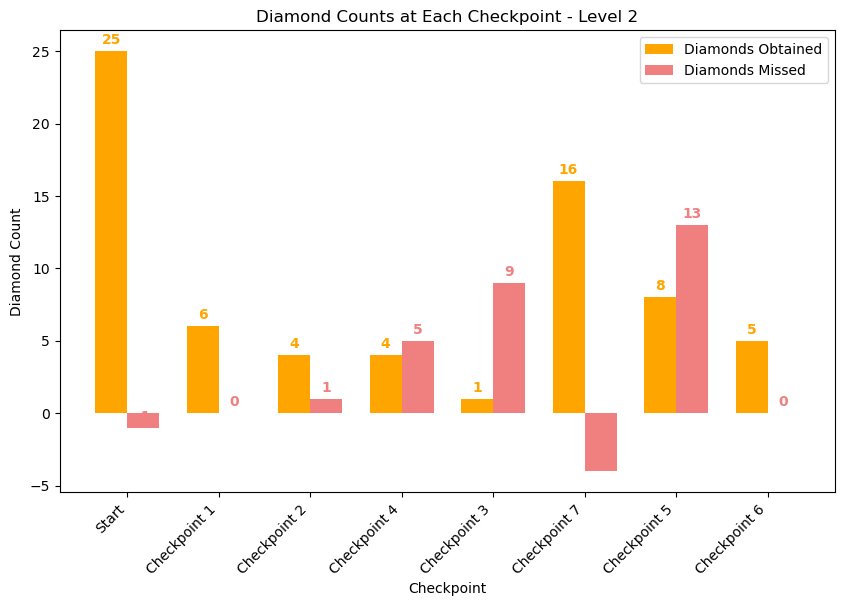

In [92]:
total_diamonds = {
    "Level 1": {
        "Start": 9,
        "Checkpoint 1": 10,
        "Checkpoint 2": 23,
        "Checkpoint 3": 23,
    },
    "Level 2": {
        "Start": 24, # start to c1
        "Checkpoint 1": 6, # c1 to c2
        "Checkpoint 2": 5, # c2 to c3
        "Checkpoint 3": 10, # c3 to c4
        "Checkpoint 4": 9, # c4 to c5
        "Checkpoint 5": 21, # c5 to c6
        "Checkpoint 6": 5, # c6 to c7
        "Checkpoint 7": 12, # c7 to c8
        "Checkpoint 8": 14, # c8 to c9 
    }
}

def plot_diamonds(data_diamonds, level):
    checkpoints = list(data_diamonds.keys())
    data_diamonds["Checkpoint 4"] = 4 if "Checkpoint 7" in data_diamonds else 9

    level_total_diamonds = total_diamonds.get(level, {})
    
    obtained_counts = [data_diamonds.get(checkpoint, 0) for checkpoint in checkpoints]
    
    missed_counts = [level_total_diamonds.get(checkpoint, 0) - obtained for checkpoint, obtained in zip(checkpoints, obtained_counts)]
    
    bar_width = 0.35
    x = np.arange(len(checkpoints))
   
    fig = plt.figure(figsize=(max(10, len(checkpoints)), 6)) 
    plt.bar(x - bar_width / 2, obtained_counts, bar_width, label='Diamonds Obtained', color='orange')
    plt.bar(x + bar_width / 2, missed_counts, bar_width, label='Diamonds Missed', color='lightcoral')

    for i, count in enumerate(obtained_counts):
        plt.text(x[i] - bar_width / 2, count + 0.5, str(count), ha='center', color='orange', fontweight='bold')

    for i, count in enumerate(missed_counts):
        plt.text(x[i] + bar_width / 2, count + 0.5, str(count), ha='center', color='lightcoral', fontweight='bold')
    
    plt.title(f"Diamond Counts at Each Checkpoint - {level}")
    plt.xlabel("Checkpoint")
    plt.ylabel("Diamond Count")

    plt.xticks(ticks=x, labels=checkpoints, rotation=45, ha='right')
    plt.legend()
    
    return fig

data_diamonds_level1 = json.loads(df.iloc[3]["Diamond Collection Data"])
print(data_diamonds_level1)
fig_diamonds_level1 = plot_diamonds(data_diamonds_level1, "Level 2")
plt.show()


In [93]:
for level in range(1, 3):
   if level == 1:
      levelstr = "One"
   else:
      levelstr = "Two"
   print(f"Generating overall insights for level {level}")
   file_path = f"LevelAnalysis/Level{levelstr}/SpreadsheetData/Playtest_Level{level}_11_12_24.csv"
   with open(file_path, "r") as file:
      lines = file.readlines()

   filtered_lines = [line for line in lines if not (line.startswith("Link to form") or line.strip(",\n") == "")]
   cleaned_csv = StringIO("".join(filtered_lines))
   df = pd.read_csv(cleaned_csv)
   for i in range(0, len(df)):
      print(f"Generating insights for player {i}")
      if not os.path.exists(f"LevelAnalysis/Level{levelstr}/Insights/Player{i}"):
         os.makedirs(f"LevelAnalysis/Level{levelstr}/Insights/Player{i}")
      # print(df.columns)
      
      data = json.loads(df.iloc[i]["MCS Overall Data"])
      graph = plot_mcs_data_overall(data)
      save_plot(graph, f"LevelAnalysis/Level{levelstr}/Insights/Player{i}/MCSOverallData.png")

      data = json.loads(df.iloc[i]["MCS Data / Checkpoint"])
      graph = plot_mcs_data_checkpoint(data)
      save_plot(graph, f"LevelAnalysis/Level{levelstr}/Insights/Player{i}/MCSDataCheckpoint.png")

      data_respawn = json.loads(df.iloc[i]["Respawn Counts"])
      graph_respawn = plot_multi_dictionary(data_respawn, "respawn", f"Level {level}")
      save_plot(graph_respawn, f"LevelAnalysis/Level{levelstr}/Insights/Player{i}/RespawnCounts.png")

      data_diamonds = json.loads(df.iloc[i]["Diamond Collection Data"])
      graph_diamonds = plot_diamonds(data_diamonds, f"Level {level}")
      save_plot(graph_diamonds, f"LevelAnalysis/Level{levelstr}/Insights/Player{i}/DiamondCounts.png")

      data = json.loads(df.iloc[i]["Heatmap Data"])
      graph = plot_heatmap_data(data)
      save_plot(graph, f"LevelAnalysis/Level{levelstr}/Insights/Player{i}/HeatmapData.png")

Generating overall insights for level 1
Generating insights for player 0
Generating insights for player 1
Generating insights for player 2
Generating insights for player 3
Generating insights for player 4
Generating insights for player 5
Generating insights for player 6
Generating insights for player 7
Generating insights for player 8
Generating insights for player 9
Generating insights for player 10
Generating insights for player 11
Generating insights for player 12
Generating insights for player 13
Generating insights for player 14
Generating insights for player 15
Generating insights for player 16
Generating insights for player 17
Generating overall insights for level 2
Generating insights for player 0
Generating insights for player 1
Generating insights for player 2
Generating insights for player 3
Generating insights for player 4
